# Problem 4.2: Shuffled Cards - data reader

The following is a small program to read the data file "data_ShuffledCards.txt", which contains four columns: Number in deck, Card name, Value, and Suit.

### Author & Date: 
- Troels C. Petersen (Niels Bohr Institute)
- 07-11-2021

***

In [1]:
# Read the data and print it to check it:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("./data_ShuffledCards.txt", skip_header=2)
number = data[:,0]
value = data[:,4]
suit = data[:,5]

print("Number of entries: ", len(number))
for i in range(len(number)) : 
    print(f"  {int(number[i]):2.0f}:  {value[i]:4.0f}   {suit[i]:3.0f}")

Number of entries:  52
   1:    13     4
   2:     9     1
   3:    14     2
   4:    12     4
   5:    11     4
   6:     8     1
   7:    13     2
   8:     8     4
   9:    10     4
  10:     7     1
  11:    11     2
  12:     7     4
  13:     9     4
  14:     5     1
  15:    10     2
  16:     3     4
  17:     6     4
  18:     4     1
  19:     7     2
  20:     2     2
  21:     5     4
  22:     3     1
  23:     6     2
  24:    13     1
  25:     4     4
  26:     2     1
  27:     5     2
  28:    11     3
  29:    14     3
  30:     9     2
  31:     2     4
  32:    10     3
  33:    14     1
  34:     8     2
  35:    13     3
  36:     9     3
  37:    12     1
  38:     4     2
  39:    12     3
  40:     8     3
  41:    10     1
  42:     3     2
  43:     4     3
  44:     7     3
  45:     6     1
  46:    14     4
  47:     3     3
  48:     5     3
  49:    12     2
  50:     6     3
  51:    11     1
  52:     2     3


In [3]:
def draw_card(N, deck, replacement):
    """Draw N cards from a deck, don't replace the drawn cards."""
    return deck[np.random.choice(deck.shape[0], size=N, replace=replacement), :]

def count_aces(draw):
    """Count the number of aces in a draw
    An ace has value 14"""
    return np.count_nonzero(draw == 14)

In [4]:
def run_experiment(deck, N_trials, replacement=True):
    draws = []
    ace_counts = np.zeros(N_trials)

    for i in range(N_trials):
        draw = draw_card(4, deck, replacement)
        #print(draw)
        draws.append(draw)
        ace_counts[i] = count_aces(draw)
    print(ace_counts)
    
    bins = 5 # 5 possible results, 0, 1, 2, 3 or 4 aces in a draw
    bin_range = (-0.5, 4+0.5)

    fig,ax = plt.subplots()
    counts, bin_edges, not_used = ax.hist(ace_counts,bins=bins,range=bin_range,density=True)
    
    # Probability of finding 3 aces or more is the sum of the last two bins
    prob = counts[-2] + counts[-1]
    print(f'Probability of drawing 3 or more aces = {prob:.10f}')

    # Add some text to the plot
    ax.plot([], [], ' ', label=f'P(3+ aces) = {prob:.4f}')
    
    ax.set_xlabel('Number of aces in draw')
    ax.set_ylabel('Probability')
    
    ax.legend()
    plt.show()

In [5]:
deck = np.stack((number, value, suit),axis=1)
#print(deck)

N_trials = 1000000

[0. 0. 0. ... 0. 1. 0.]
Probability of drawing 3 or more aces = 0.0032080000


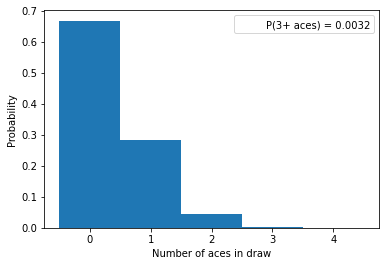

In [6]:
run_experiment(deck, N_trials, replacement=True)

[1. 0. 1. ... 0. 0. 1.]
Probability of drawing 3 or more aces = 0.0017910000


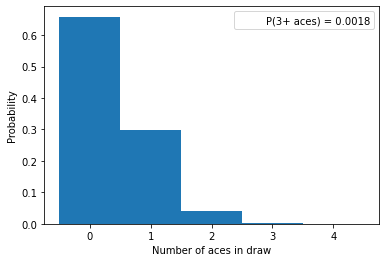

In [7]:
run_experiment(deck, N_trials, replacement=False)

In [8]:
p_0 = (48/52)**4
p_1 = 4 * (4/52) * (48/52)**3
p_2 = 6 * (4/52)**2 * (48/52)**2
p_3 = 4 * (4/52)**3 * (48/52)
p_4 = (4/52)**4

print(p_0,p_1,p_2,p_3,p_4)

print(p_0+p_1+p_2+p_3+p_4)

theoretical_value = p_3+p_4
print(theoretical_value)

0.7260249991246807 0.24200833304156022 0.030251041630195027 0.0016806134238997238 3.501277966457758e-05
1.0000000000000002
0.0017156262035643013


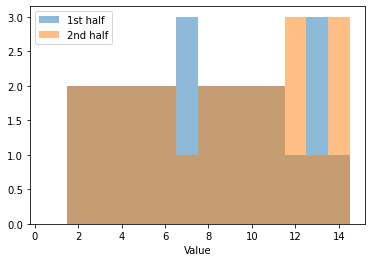

In [9]:
half1 = deck[:int(52/2),:]
half2 = deck[int(52/2):,:]
#print(half1,half2)

my_bins = 14
my_range = (0.5,14.5)

fig1,ax1 = plt.subplots()
ax1.hist(half1[:,1],bins=my_bins,range=my_range,alpha=0.5,label='1st half')
ax1.hist(half2[:,1],bins=my_bins,range=my_range,alpha=0.5,label='2nd half')

ax1.set_xlabel('Value')

ax1.legend()
plt.savefig('Problem_4.2_value.png',dpi=600)

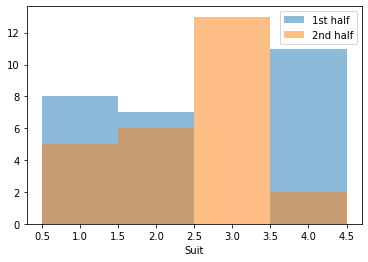

In [10]:
half1 = deck[:int(52/2),:]
half2 = deck[int(52/2):,:]
#print(half1,half2)

my_bins = 4
my_range = (0.5,4.5)

fig1,ax1 = plt.subplots()
ax1.hist(half1[:,2],bins=my_bins,range=my_range,alpha=0.5,label='1st half')
ax1.hist(half2[:,2],bins=my_bins,range=my_range,alpha=0.5,label='2nd half')

ax1.set_xlabel('Suit')

ax1.legend()
plt.savefig('Problem_4.2_suit.png',dpi=600)